## IMPORTING THE DATA 

In [42]:
#importing preprocessing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#importing the data 

data = pd.read_csv("Res_clean_2.csv", encoding='ISO-8859-1')

In [44]:
#vizualizing the column names and types 

column_names = data.columns.tolist()
print(column_names)
print(data.dtypes)

['ID', 'Cinephile', 'N_movies_week', 'Platform', 'Frequency_international', 'Language', 'Company ', 'Company_preference', 'Festival_attendance_offline', 'Offline_pros', 'Grade_offline', 'Online_awarness', 'Festival_attendance_online', 'Grade_online', 'Pros_online', 'Advantage_online', 'Willingness_topay_online', 'Online_replacements[1-10]', 'More_likely_online[1-10]', 'Online_lacks_social[1-10]', 'Liking_easy_movies[1-10]', 'Age', 'Gender', 'Country ']
ID                               int64
Cinephile                       object
N_movies_week                   object
Platform                        object
Frequency_international         object
Language                        object
Company                         object
Company_preference              object
Festival_attendance_offline     object
Offline_pros                    object
Grade_offline                   object
Online_awarness                 object
Festival_attendance_online      object
Grade_online                   float

## CODING AND VISUALIZING THE DATA 

in this section we are transforming "object" type variables into numerical or dummy ones. This will help us with data vizualization and allow us to make predictions. 

### coding

In [45]:
## COMPANY ##

# we are creating 3 dummy variables, each representing a preference of people to watch movies with
# the reason we do not create a categorical variable is that more options could be selected by each person 
# the categorical varible would then pick up on multiple selections and create a category for each combination 
# we want to avoid this as it would be messy to analyze and not very useful

# Define the values the variable can originally take
options = ['Friends', 'Family', 'Strangers']

# Clean the column by stripping any trailing semicolons
data['Company '] = data['Company '].str.strip(';')

# Initialize the dummy columns with 0
for option in options:
    data[option] = 0

# Populate the dummy columns
for option in options:
    data[option] = data['Company '].apply(lambda x: 1 if option in x.split(';') else 0)



In [46]:
## WILLINGNESS TO PAY ##

# we transform it into a categorical variable
# the values 0, 1 and 2 are symbolical but their ratio is important when using linear models
# there is no mapping for "more than 20 $" as it was not selected by anybody 

#Define mapping 
mapping = {
    'For free only': 0,
    'Less than 10$': 1,
    'Between 10$ and 20$ (included)': 2
}

# Apply the mapping
data['Price_online'] = data['Willingness_topay_online'].map(mapping)

Price_online = data['Price_online']

In [47]:
data['Platform'].head()

0                      Un-paid streaming servicesÊ;
1           Paid streaming services (e.g. Netflix);
2                                           Cinema;
3           Paid streaming services (e.g. Netflix);
4    Paid streaming services (e.g. Netflix);Cinema;
Name: Platform, dtype: object

In [48]:
## PLATFORM ##

# creating dummy variables like in the case of COMPANY 
# we drop unpaid streaming serices as there are only 2 observations

# Define options
options = ['Paid streaming services (e.g. Netflix)', 'Cinema', 'Live TV Streaming', 'Un-paid streaming servicesÊ']

# Clean the Answers column by stripping any trailing semicolons
data['Platform'] = data['Platform'].str.strip(';')

# Initialize the dummy columns with 0
for option in options:
    data[option] = 0

# Populate the dummy columns
for option in options:
    data[option] = data['Platform'].apply(lambda x: 1 if option in x.split(';') else 0)

data['Un-paid streaming'] = data['Un-paid streaming servicesÊ']
data['Paid streaming'] = data['Paid streaming services (e.g. Netflix)']
data.drop(['Un-paid streaming servicesÊ'], axis=1, inplace=True)
data.drop(['Paid streaming services (e.g. Netflix)'], axis=1, inplace=True)


In [49]:
## FESTIVAL ATTENDANCE OFFLINE ##

# we create a dummy variable. we only separate into people who have attended at least once and who have never attended since there are few 
# observations for other more specific cases

data['Fest_att_offline_dummy'] = data['Festival_attendance_offline'].apply(lambda x: 0 if x == 'Never' else 1)

Fest_att_offline_dummy = data['Fest_att_offline_dummy']

In [50]:
### FESTIVAL ATTENDANCE ONLINE

# we create a dummy variable. we only separate into people who have attended at least once and who have never attended since there are few 
# observations for other more specific cases

data['Fest_att_online_dummy'] = data['Festival_attendance_online'].apply(lambda x: 0 if x == 'Never' else 1)

Fest_att_online_dummy = data['Fest_att_online_dummy']

In [51]:
### GRADE OFFLINE

# we transform the type of the variable as it is already in numbers but the wrong type

data['Grade_offline'] = pd.to_numeric(data['Grade_offline'], errors='coerce')

Grade_offline = data['Grade_offline']

In [52]:
# N MOVIES PER WEEK

# we create a categorical variable. The numbers do not really matter, however i chose 3 because it is the average as 7 as they probably 
# watch around a movie a day. The ratio could be meaningful for linear models but with such few observations is doesn't really affect 
# predictions

mapping = {
    '0': 0,
    '1': 1,
    '5-2': 3,
    '5+': 7
}

# Apply the mapping
data['N_movies_week_cat'] = data['N_movies_week'].map(mapping)

N_movies_week_cat = data['N_movies_week_cat']

In [53]:
# LANGUAGE 

# we create a dummy variable.

data['Language_dummy'] = data['Language'].apply(lambda x: 1 if x == 'Original language (with or without subtitles)' else 0)

Language_dummy = data['Language_dummy']

In [54]:
# AGE 

# we create a dummy variable. We look at wether respondents are within the age range we were targeting or older

data['Age_dummy'] = data['Age'].apply(lambda x: 1 if x == 'Older than 26' else 0)


Age_dummy = data['Age_dummy']


In [55]:
#CHINEPHILE

# we create a dummy variable.

data['Cinephile_dummy'] = data['Cinephile'].apply(lambda x: 1 if x == 'Yes' else 0)

Cinephile_dummy = data['Cinephile_dummy'] 

In [56]:
#GENDER 

# we create a dummy variable. we group "other" together with female as there are only 2 observations and 
# binary variables work better than categorical

data['Gender_dummy'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

Gender_dummy = data['Gender_dummy'] 

### visualizing

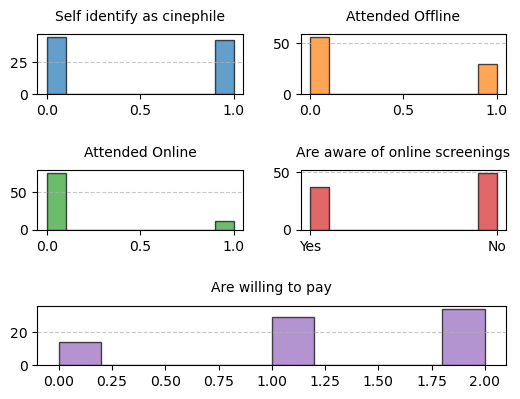

In [57]:
import matplotlib.pyplot as plt

# Set the figure size to match the PowerPoint slide aspect ratio (5.54 x 4.35 inches)
plt.figure(figsize=(5.54, 4.35))

# Define a better layout
titles = ['Self identify as cinephile', 'Attended Offline', 'Attended Online', 
          'Are aware of online screenings', 'Are willing to pay']
columns = ['Cinephile_dummy', 'Fest_att_offline_dummy', 'Fest_att_online_dummy', 
           'Online_awarness', 'Price_online']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plot the histograms with style adjustments
for i, (col, title, color) in enumerate(zip(columns, titles, colors), start=1):
    # Create a standard grid for the first 4 plots
    if i < 5:
        plt.subplot(3, 2, i)
    else:
        # Make the last plot span across two columns
        plt.subplot(3, 2, (5, 6))

    plt.hist(data[col], bins=10, color=color, edgecolor='black', alpha=0.7)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.title(title, fontsize=10, pad=10)

# Adjust layout to avoid overlap
plt.tight_layout(pad=2.0)

# Save the figure as an image
plt.savefig('histograms_for_ppt.png', dpi=300)
plt.show()


<Axes: >

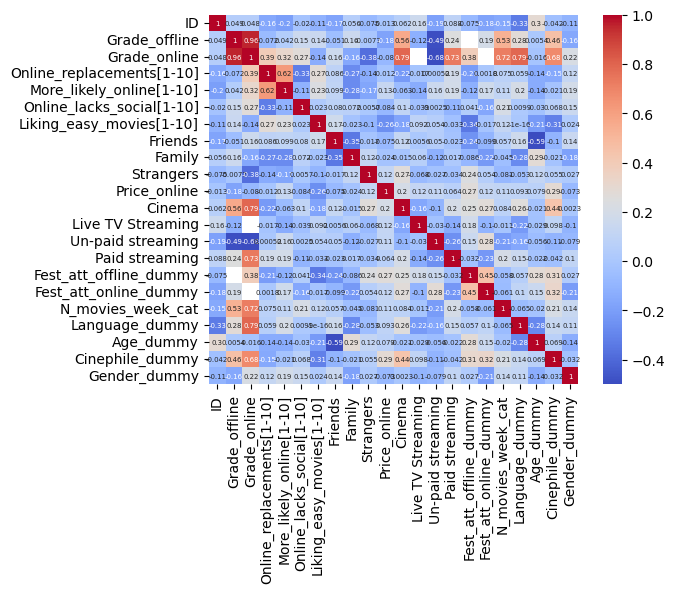

In [58]:
# we create a correlation matrix to better explore the relationship between the various variables. 
# we list a few observations below. Overall, they are coherent with what one would logically expect to be true 
# we are quite confindent about the quality of the answers we received

corrmat = data.corr(numeric_only=True)
sns.heatmap(corrmat, vmax = 1, vmin = -0.5 , square=True, annot = True, annot_kws={'size': 5}, cmap="coolwarm")

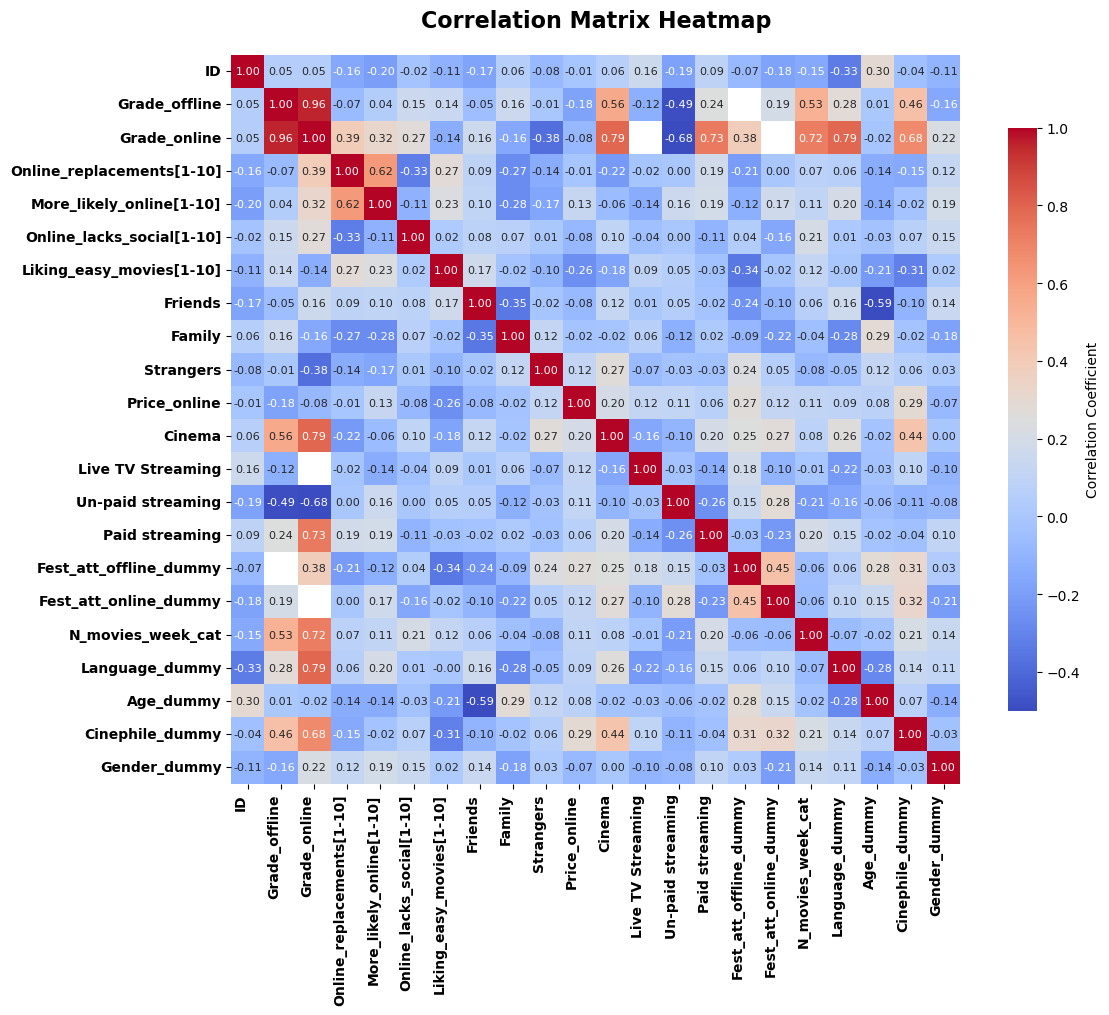

In [59]:
# we create a correlation matrix to better explore the relationship between the various variables. 
# we list a few observations below. Overall, they are coherent with what one would logically expect to be true 
# we are quite confindent about the quality of the answers we received

import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corrmat = data.corr(numeric_only=True)

# Set up the figure
plt.figure(figsize=(12, 10))

# Create a heatmap with improved aesthetics
sns.heatmap(
    corrmat, 
    vmax=1, 
    vmin=-0.5, 
    square=True, 
    annot=True, 
    annot_kws={'size': 8},  # Increased size for better readability
    fmt=".2f",             # Limit decimal places for clarity
    cmap="coolwarm",       # Aesthetic colormap
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}  # Adjust colorbar size and add label
)

# Add title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16, weight='bold', pad=20)
plt.xticks(fontsize=10, rotation=90, ha='right', weight='bold')
plt.yticks(fontsize=10, rotation=0, weight='bold')

# Display the plot
plt.tight_layout()
plt.show()


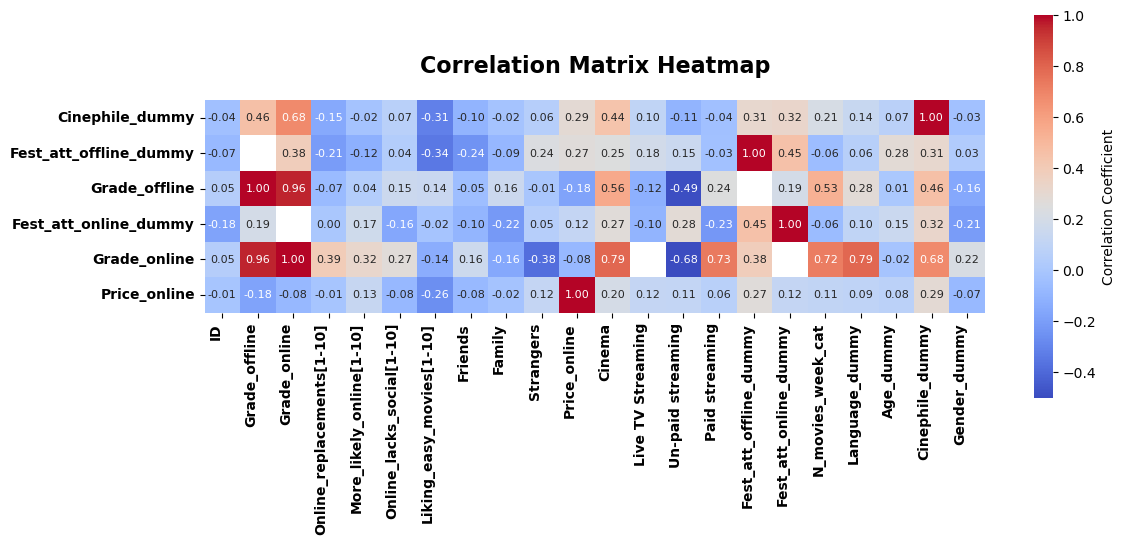

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corrmat = data.corr(numeric_only=True)

# Select specific rows you want to display
rows_to_display = ['Cinephile_dummy', 'Fest_att_offline_dummy', 
                   'Grade_offline','Fest_att_online_dummy', 
                   'Grade_online', 'Price_online'] 
corrmat_subset = corrmat.loc[rows_to_display, :]  # Slice the matrix

# Set up the figure
plt.figure(figsize=(12, 6))

# Create a heatmap for the subset
sns.heatmap(
    corrmat_subset, 
    vmax=1, 
    vmin=-0.5, 
    square=True, 
    annot=True, 
    annot_kws={'size': 8}, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)

# Add title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16, weight='bold', pad=20)
plt.xticks(fontsize=10, rotation=90, ha='right', weight='bold')
plt.yticks(fontsize=10, weight='bold')

# Display the plot
plt.tight_layout()
plt.show()


observations:

people who go to the cinema more often are more likely to give high grades to both online and offline film festivals

people who use streaming services more are more likely to give high grades to online ff

online and offline ff grades are strongly correlated

age is positively correlated with ff attendance, especially offline

self identifyied cinephiles do attend the cinema and ff more and give higher grades

liking easy movies is negatively correlated with ff attendance

liking watching movies with strangers is neg correlated with the grade of online film festivals


## PREDICTING OFFLINE ATTENDANCE - LOGISTIC REGRESSION


The first algorithm we try is logistic regression. Calling logreg a linear algorithm is not exactly correct, as it does not produce a straight line, but it can be thought of as applying a linear regression and then applying a function to said linear regression to transform the values into probabilties (which is what we want since online attendance is a binary variable)

In [61]:
# importing the necessary libraries for logistic regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [62]:
# importing the necessary libraries for k-fold cross validation

from sklearn.model_selection import KFold, cross_val_score
kfolds = KFold(n_splits=5, shuffle=True, random_state=1)

In [63]:
# removing the non-numerical columns from the dataframe

data_numerical = data.drop(columns=['Cinephile', 'ID', 'N_movies_week', 'Platform', 'Frequency_international', 'Language',
                       'Company ', 'Company_preference', 'Festival_attendance_offline', 'Offline_pros', 'Festival_attendance_online', 
                       'Pros_online', 'Advantage_online', 'Willingness_topay_online', 'Age', 'Gender', 'Country ', 'Online_awarness']) 

In [64]:
# data_numerical_no_na= data_numerical.dropna() #we only have 3 observations left so we dont do this

# creating our target column, filling na's with the mean (can also be done with the median or mode, it does not affect results significantly)
# and splitting into training and testing data set

y = data_numerical['Fest_att_offline_dummy']

X = data_numerical.drop(columns = ['Fest_att_offline_dummy', 'Grade_offline']) #comment out to test
# X = data_numerical.drop(columns = ['Fest_att_offline_dummy', 'Grade_online', 'Grade_offline']) #uncomment to test 
X = X.fillna(X.mean()) #comment out to test
# X = X.fillna(X.median()) #uncomment to test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

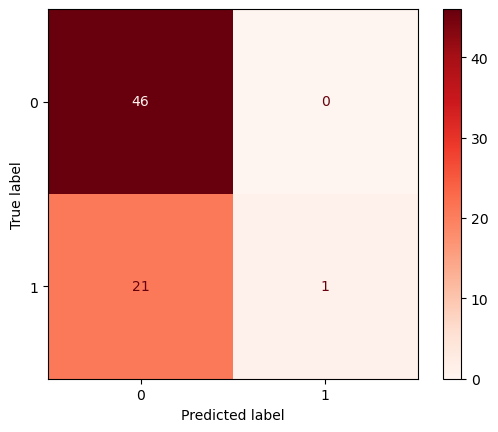

In [65]:

from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize the classifier (we use standard parameters)
logreg = LogisticRegression(penalty='l2', C=0.01, solver='lbfgs', multi_class='ovr', max_iter = 10000)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=2)

# Get cross-validated predictions for all folds
y_pred_cv = cross_val_predict(logreg, X_train, y_train, cv=kf)

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred_cv)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')

## PREDICTING OFFLINE ATTENDANCE - HISTOGRAM GRADIENT BOOSTING


NOT INCLUDING ONLINE ATTENDANCE AS A PREDICTOR - HISTOGRAM GRADIENT BOOSTING

We try histogram gradient boosting to avoid having to infer NaNs, which is what affects the performance of our linear model the most. As you can see in the confusion matrices, the performance is improved. We try a version with and without including online attendance.

In [66]:
y = data['Fest_att_offline_dummy']
# X = data_numerical.drop(columns = ['Fest_att_offline_dummy', 'Fest_att_online_dummy', 
#                                       'Grade_online', 'Grade_offline'])  #uncomment to test

X = data_numerical.drop(columns = ['Fest_att_offline_dummy', 'Grade_online', 'Grade_offline']) #comment to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

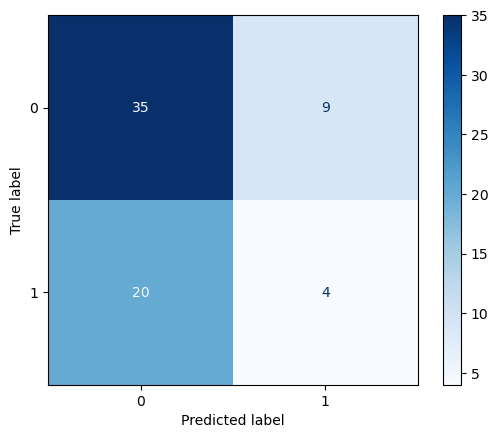

In [67]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize the classifier
clf = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_depth=10)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Get cross-validated predictions for all folds
y_pred_cv = cross_val_predict(clf, X_train, y_train, cv=kf)

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred_cv)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')


INCLUDING ONLINE ATTENDANCE AS A PREDICTOR - HISTOGRAM GRADIENT BOOSTING


In [68]:
y_2 = data['Fest_att_offline_dummy']
X_2 = data_numerical.drop(columns=['Fest_att_offline_dummy','Grade_offline']) 

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=1)

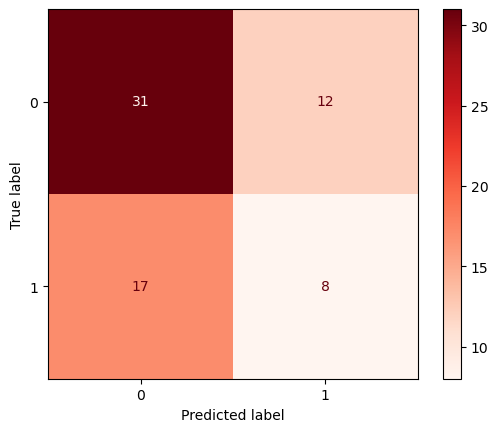

In [69]:
clf = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_depth=10)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=4)

# Get cross-validated predictions for all folds
y_pred_cv_2 = cross_val_predict(clf, X_train_2, y_train_2, cv=kf)

# Compute the confusion matrix
cm = confusion_matrix(y_train_2, y_pred_cv_2)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')


## PREDICTING OFFLINE ATTENDANCE - LINEAR REGRESSION

In [70]:
y = data_numerical['Fest_att_offline_dummy']
X = data_numerical[['Cinephile_dummy', 'Price_online']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [71]:
data_reg = data_numerical[['Cinephile_dummy', 'Price_online', 'Fest_att_offline_dummy']].dropna()

In [72]:
y = data_reg['Fest_att_offline_dummy']
X = data_reg[['Cinephile_dummy', 'Price_online']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

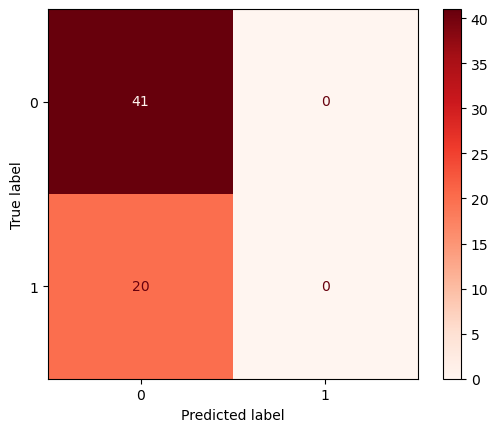

In [73]:

from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize the classifier (we use standard parameters)
logreg = LogisticRegression(penalty='l2', C=0.01, solver='lbfgs', multi_class='ovr', max_iter = 10000)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=4)

# Get cross-validated predictions for all folds
y_pred_cv = cross_val_predict(logreg, X_train, y_train, cv=kf)

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred_cv)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


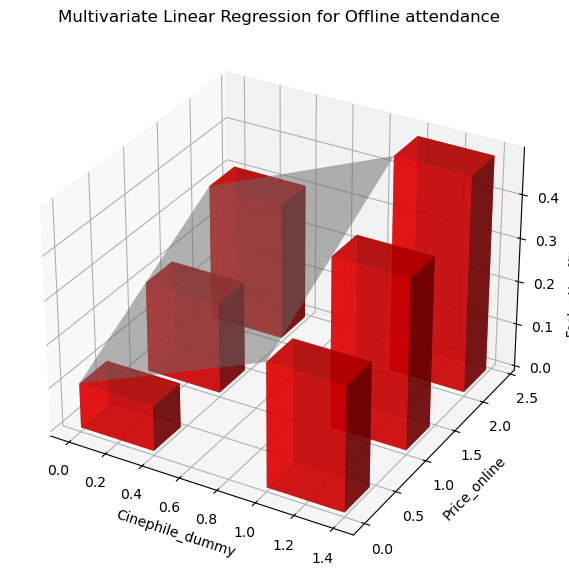

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get unique values of the categorical variables for bars
categories_cinephile = X['Cinephile_dummy'].unique()
categories_price = X['Price_online'].unique()

# Create a grid for combinations of the categories
x1, x2 = np.meshgrid(categories_cinephile, categories_price)
x_grid = np.c_[x1.ravel(), x2.ravel()]

# Predict the target variable for the grid
y_pred = model.predict(x_grid)
y_pred = y_pred.reshape(x1.shape)

# Plotting the 3D bar chart and regression plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create bars for the predicted values
for i, cinephile in enumerate(categories_cinephile):
    for j, price in enumerate(categories_price):
        ax.bar3d(
            cinephile,          # x position
            price,              # y position
            0,                  # z position (starts at 0)
            dx=0.4,             # width of the bar
            dy=0.4,             # depth of the bar
            dz=y_pred[j, i],    # height of the bar (predicted value)
            color='red', alpha=0.7
        )

# Create a regression plane for visualization
x1_range = np.linspace(categories_cinephile.min(), categories_cinephile.max(), 50)
x2_range = np.linspace(categories_price.min(), categories_price.max(), 50)
x1_plane, x2_plane = np.meshgrid(x1_range, x2_range)
x_grid_plane = np.c_[x1_plane.ravel(), x2_plane.ravel()]

# Predict values for the regression plane
y_plane_pred = model.predict(x_grid_plane)
y_plane_pred = y_plane_pred.reshape(x1_plane.shape)

# Plot the regression plane
ax.plot_surface(x1_plane, x2_plane, y_plane_pred, color='grey', alpha=0.5, rstride=100, cstride=100)

# Axis labels
ax.set_xlabel('Cinephile_dummy')
ax.set_ylabel('Price_online')
ax.set_zlabel('Fest_att_offline_dummy')
ax.set_title('Multivariate Linear Regression for Offline attendance')

plt.show()


In [77]:
clf1 = LogisticRegression(random_state=2).fit(X, y)

In [78]:
print(clf1.coef_, clf1.intercept_)

[[0.5706822  0.67495508]] [-2.03896718]
